In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  modelling

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings




ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df= pd.read_csv("./data/CarPrice_Assignment.csv")

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
X=df.drop(columns=["price"],axis=1)

In [ ]:
y=df['price']

In [ ]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


numerical_transformer=StandardScaler()
categorical_transformer=OneHotEncoder()


preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',categorical_transformer,cat_features),
        ('StandardScaler',numerical_transformer,num_features),
    ]
)

In [ ]:
X=preprocessor.fit_transform(X)

In [ ]:
y.shape

(205,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((164, 200), (41, 200))

In [ ]:
def evaluate_model(true,predicted):
    mse=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mse,rmse,r2_square

In [ ]:
models={
    "linear regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor(),
}
model_list=[]
r2_list=[]

In [ ]:



for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_mse , model_train_rmse , model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mse , model_test_rmse , model_test_r2=evaluate_model(y_test,y_test_pred)
    
    
    print(list(models.keys())[i])
    
    model_list.append(list(models.keys())[i])
    
    print("model performance for training set")
    print(f"RMSE:  {model_train_rmse}")
    print(f"MSE:  {model_train_mse}")
    print(f"r2 score:  {model_train_r2}")
    
    print("--------------------------------------------------------")
    
    print("model performance for testing set")
    print(f"RMSE:  {model_test_rmse}")
    print(f"MSE:  {model_test_mse}")
    print(f"r2 score:  {model_test_r2}")
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print("\n")

linear regression
model performance for training set
RMSE:  355.9463327444159
MSE:  170.62445195335098
r2 score:  0.9978755468449644
--------------------------------------------------------
model performance for testing set
RMSE:  13360.666552887144
MSE:  7036.82341474511
r2 score:  -1.2611897487404913


Lasso
model performance for training set
RMSE:  524.0295654396887
MSE:  343.8335433812947
r2 score:  0.9953954234846325
--------------------------------------------------------
model performance for testing set
RMSE:  4014.456836097102
MSE:  2429.9680799747803
r2 score:  0.7958570704999459


Ridge
model performance for training set
RMSE:  1039.259693586915
MSE:  795.066560392747
r2 score:  0.9818896734346069
--------------------------------------------------------
model performance for testing set
RMSE:  2957.836889388154
MSE:  1951.6985710611598
r2 score:  0.8891771793894048


KNeighborsRegressor
model performance for training set
RMSE:  2713.9229931828995
MSE:  1662.4134146341462
r2 

In [ ]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name", "r2_score"]).sort_values(by=["r2_score"], ascending=False)

,Model Name,r2_score
5,RandomForestRegressor,0.956747
7,CatBoostRegressor,0.934888
6,XGBRegressor,0.910401
8,AdaBoostRegressor,0.898847
2,Ridge,0.889177
4,DecisionTreeRegressor,0.858023
1,Lasso,0.795857
3,KNeighborsRegressor,0.720811
0,linear regression,-1.261190


In [ ]:
Ran_model=RandomForestRegressor()
Ran_model=Ran_model.fit(X_train,y_train)
y_pred=Ran_model.predict(X_test)
score=r2_score(y_test,y_pred)*100

print(f"Accuracy of the model is {score} ")

Accuracy of the model is 95.57896770261132 


In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0, 0.5, 'Predicted')

<AxesSubplot: xlabel='price'>

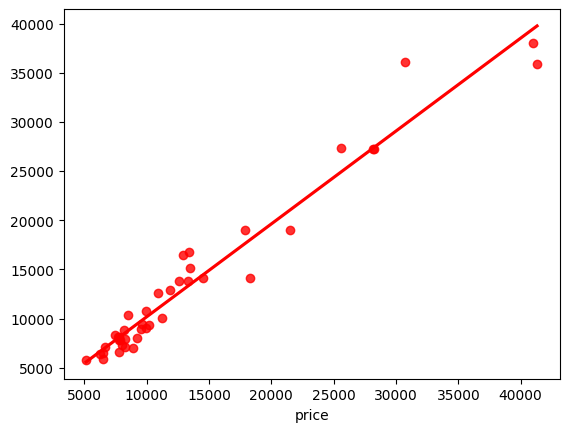

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [ ]:
pred_df=pd.DataFrame({
    "Actual value": y_test,
    "predicted value": y_pred,
    "difference":y_test - y_pred
})

In [ ]:
pred_df

,Actual value,predicted value,difference
15,30760.000,36048.335,-5288.335
9,17859.167,18964.430,-1105.263
100,9549.000,8923.700,625.300
132,11850.000,12898.370,-1048.370
68,28248.000,27217.850,1030.150
95,7799.000,6628.210,1170.790
159,7788.000,7814.220,-26.220
162,9258.000,8047.000,1211.000
147,10198.000,9364.320,833.680
182,7775.000,8099.910,-324.910
